In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Loading the dataset from Keras dataset module

170500096/170498071 [==============================] - 7s 0us/step


In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
# CIFAR-10 Labels

In [ ]:
# Normalization
x_train = x_train/255
x_test = x_test/255
# Every Neuron is expected to have value from 0 to 1 to converge quickly(Gradient Descent)

'bird'

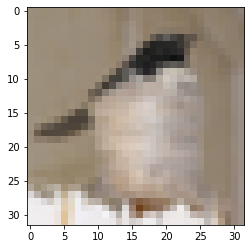

In [ ]:
# Displaying Image
# Lets see some of the random images and its respective labels
import random
import matplotlib.pyplot as plt
i = random.randint(1,50000)
plt.imshow(x_train[i])
classes[y_train[i][0]]

In [ ]:
# ANN Network

# I/p Layer - Flatten
# Hidden layer - 2048, AF = 'RELU'
# O/p Layer - 10 , AF-Softmax

In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
ann.add(Dense(2048,activation='relu'))
ann.add(Dense(10,activation='softmax'))

In [ ]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = ann.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 2.3054 - accuracy: 0.2865 - val_loss: 1.6965 - val_accuracy: 0.3843
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.7070 - accuracy: 0.3900 - val_loss: 1.6149 - val_accuracy: 0.4285
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6414 - accuracy: 0.4147 - val_loss: 1.6372 - val_accuracy: 0.4025
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5833 - accuracy: 0.4341 - val_loss: 1.5663 - val_accuracy: 0.4414
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5414 - accuracy: 0.4503 - val_loss: 1.5478 - val_accuracy: 0.4492
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5267 - accuracy: 0.4602 - val_loss: 1.5327 - val_accuracy: 0.4519
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4968 - accuracy: 0.4691 - val_loss: 1.5701 - val_accuracy

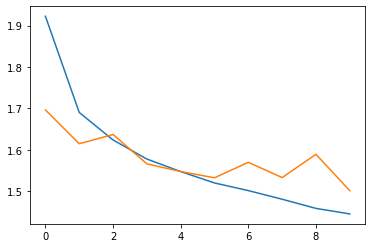

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
# CNN Model
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
cnn = keras.Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128,(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax'))

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 40s 8ms/step - loss: 1.8795 - accuracy: 0.2949 - val_loss: 1.3356 - val_accuracy: 0.5197
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3617 - accuracy: 0.5077 - val_loss: 1.1813 - val_accuracy: 0.5720
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1850 - accuracy: 0.5824 - val_loss: 1.0917 - val_accuracy: 0.6120
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0663 - accuracy: 0.6271 - val_loss: 1.0371 - val_accuracy: 0.6375
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9739 - accuracy: 0.6563 - val_loss: 0.9676 - val_accuracy: 0.6612
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9109 - accuracy: 0.6816 - val_loss: 0.9114 - val_accuracy: 0.6838
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8449 - accuracy: 0.7043 - val_loss: 0.8763 - val_ac

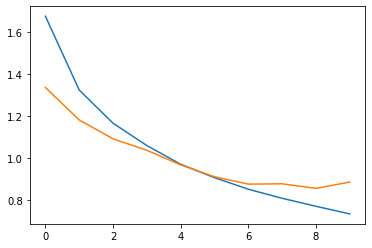

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

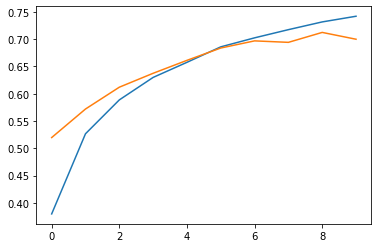

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
# Model prediction for test data

y_pred = cnn.predict_classes(x_test)
y_pred.reshape(1,-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[3, 8, 8, ..., 5, 1, 7]])

In [ ]:
accuracy_score(y_pred,y_test)*100

69.99

In [ ]:
confusion_matrix(y_pred,y_test)
# True Negative
# False Negative
# False Positive
# True Positive

array([[686,  23,  54,  14,  23,  11,   6,  18,  47,  16],
       [  8, 744,   3,   1,   4,   3,   5,   1,  13,  44],
       [102,  10, 667,  98, 121, 106,  54,  57,  23,  13],
       [ 20,   8,  80, 578,  88, 208,  57,  79,  21,  21],
       [ 16,   1,  60,  60, 628,  66,  27,  88,   8,   6],
       [  3,   3,  35,  98,  21, 525,  12,  61,   1,   5],
       [  9,  18,  70,  94,  64,  40, 815,  18,   3,  12],
       [  7,   2,  12,  13,  38,  24,   3, 651,   1,   7],
       [107,  68,  11,  22,  12,   4,  13,   4, 866,  37],
       [ 42, 123,   8,  22,   1,  13,   8,  23,  17, 839]])

In [ ]:
# How wrong your model is?
# precision    recall  f1-score
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       898
           1       0.74      0.90      0.81       826
           2       0.67      0.53      0.59      1251
           3       0.58      0.50      0.54      1160
           4       0.63      0.65      0.64       960
           5       0.53      0.69      0.60       764
           6       0.81      0.71      0.76      1143
           7       0.65      0.86      0.74       758
           8       0.87      0.76      0.81      1144
           9       0.84      0.77      0.80      1096

    accuracy                           0.70     10000
   macro avg       0.70      0.71      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [ ]:
cnn.save('demo-model.hdf5') # Saving the cnn model in hdf5 file

# This saves the weights which are trained by the Neural Network